In [8]:
import sys
import os
import pandas as pd

# Add the project root to the Python path
sys.path.append(os.path.join(os.getcwd(), '..'))

# Import the project modules
from src.config import setup_logging
from src.extract import fetch_statsbomb_event_data
from src.transform import transform_to_progressive_actions, transform_to_turnovers
from src.viz import create_progression_heatmaps

# Reload modules when code is changed (uncomment for development)
%load_ext autoreload
%autoreload 2

# Init logging
logger = setup_logging(log_file="../logs/build_up_heatmaps.log")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
events = fetch_statsbomb_event_data()
#list(events.columns)

2025-10-02 22:26:16,714 - src.extract.statsbomb_data - INFO - Fetching StatsBomb event data for Europe - UEFA Euro - 2024 - male
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: No

In [10]:
prog_actions = transform_to_progressive_actions(events)
prog_actions.info()

2025-10-02 22:26:36,502 - src.transform.build_up_events - INFO - Transforming 187858 records from events data to progressive actions...
2025-10-02 22:26:37,299 - src.transform.build_up_events - INFO - Found 87760 actions (passes and carries).
2025-10-02 22:26:37,633 - src.transform.build_up_events - INFO - Found 14870 progressive actions (passes and carries).
2025-10-02 22:26:37,686 - src.transform.build_up_events - INFO - Done! Found 12514 progressive actions in own half (x < 60).


<class 'pandas.core.frame.DataFrame'>
Index: 12514 entries, 335 to 149941
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              12514 non-null  object 
 1   match_id        12514 non-null  int64  
 2   team            12514 non-null  object 
 3   player          12514 non-null  object 
 4   position        12514 non-null  object 
 5   timestamp       12514 non-null  object 
 6   x               12514 non-null  float64
 7   y               12514 non-null  float64
 8   end_x           12514 non-null  float64
 9   end_y           12514 non-null  float64
 10  progression     12514 non-null  float64
 11  type            12514 non-null  object 
 12  under_pressure  2000 non-null   object 
 13  possession      12514 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 1.4+ MB


In [11]:
turnovers = transform_to_turnovers(events)
turnovers.info()

2025-10-02 22:26:37,806 - src.transform.build_up_events - INFO - Transforming 187858 records from events data to turnovers data...
2025-10-02 22:26:40,516 - src.transform.build_up_events - INFO - Found 9862 turnovers.
2025-10-02 22:26:40,536 - src.transform.build_up_events - INFO - Filtered out duplicates. 9862 turnovers left.


<class 'pandas.core.frame.DataFrame'>
Index: 9862 entries, 333 to 186805
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9862 non-null   object 
 1   match_id              9862 non-null   int64  
 2   team                  9862 non-null   object 
 3   player                9862 non-null   object 
 4   position              9862 non-null   object 
 5   timestamp             9862 non-null   object 
 6   possession            9862 non-null   int64  
 7   possession_team       9862 non-null   object 
 8   x                     9862 non-null   float64
 9   y                     9862 non-null   float64
 10  type                  9862 non-null   object 
 11  50_50                 121 non-null    object 
 12  pass_outcome          5010 non-null   object 
 13  pass_end_location     5010 non-null   object 
 14  pass_type             1160 non-null   object 
 15  dribble_outcome       

2025-10-02 22:42:27,161 - src.viz.progression_heatmaps - INFO - Creating progression heatmaps for Spain.


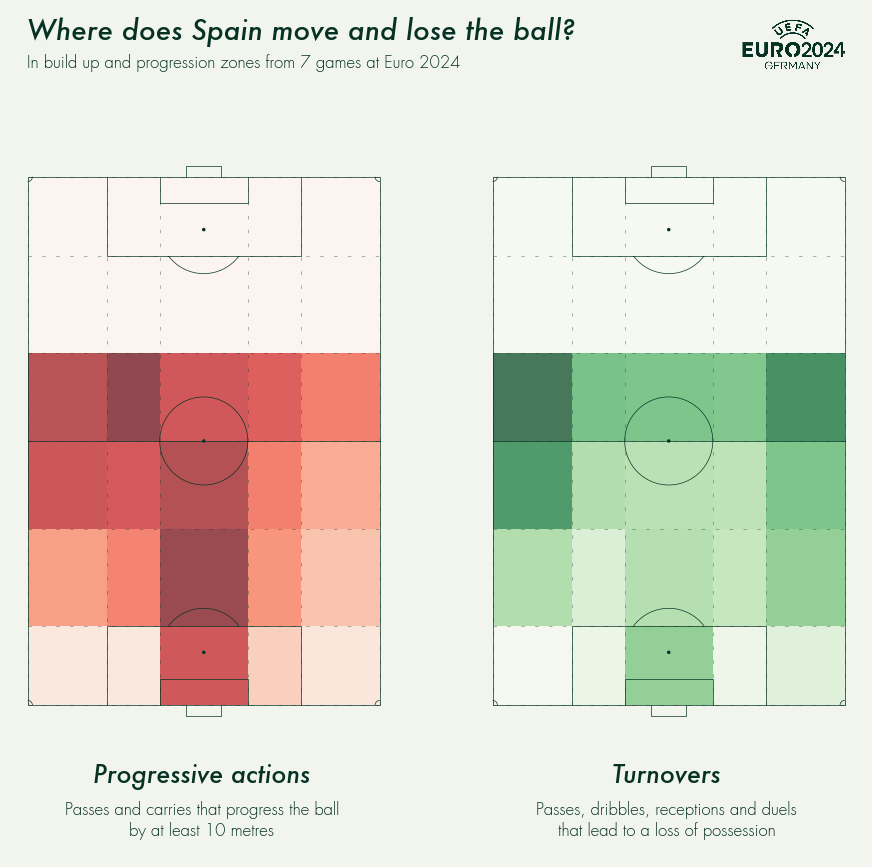

In [37]:
fig = create_progression_heatmaps(
    team="Spain",
    prog_actions_df=prog_actions,
    turnovers_df=turnovers,
)